# Pandas
### 1. 資料的連接(Join)與合併(Merge)
- `df.concat(ignore_index, axis)`：連接兩個DataFrame，可以指定`axis`，$0$從下方加上列(Row)，$1$從右邊加上行(Column)。`ignore_index=True`可以重編索引標籤(Index Label)。
  - `df.append()`：舊的函數，只支援從下方加上列。
- `df.merge(how="inner, on, left_on, right_on)`：資料庫風格合併(Database-Style Join)。`how`支援`left`、`right`、`outer`、`inner`、`cross`五種合併方式。`on`行名(Column Name)讓該行作為合併用的鍵(Key)，也可以用`left_on`和`right_on`分別指定。
- `df.join(how="left", on)`：利用索引標籤(Index Label)來合併。`how`也同樣支援各種合併(Join)。`on`指定行名(Column Name)讓原DataFrame的該行作為鍵(Key)，用來對對象DataFrame的索引標籤(Index Label)執行合併(Join)。

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
left = pd.DataFrame(
  {
    "A": ["A0", "A1", "A2"],
    "B": ["B0", "B1", "B2"],
    "C": ["C0", "C1", "C2"]
  }
)
left

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [ ]:
right = pd.DataFrame(
  {
    "A": ["A3", "A4", "A5"],
    "B": ["B3", "B4", "B5"],
    "C": ["C3", "C4", "C5"]
  }
)
right

,A,B,C
0,A3,B3,C3
1,A4,B4,C4
2,A5,B5,C5


In [ ]:
# `concat()`
pd.concat([left, right])

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
0,A3,B3,C3
1,A4,B4,C4
2,A5,B5,C5


In [ ]:
# Ignore index
pd.concat([left, right], ignore_index=True)

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5


In [ ]:
# Set axis to concatenate
pd.concat([left, right], axis=1)

,A,B,C,A,B,C
0,A0,B0,C0,A3,B3,C3
1,A1,B1,C1,A4,B4,C4
2,A2,B2,C2,A5,B5,C5


In [ ]:
# `merge()`
left = pd.DataFrame(
  {
    "Key": ["K0", "K1", "K2"],
    "A": ["A0", "A1", "A2"],
    "B": ["B0", "B1", "B2"],
  }
)

right = pd.DataFrame(
  {
    "Key": ["K0", "K1", "K2"],
    "C": ["C0", "C1", "C2"],
    "D": ["D0", "D1", "D2"],
  }
)

pd.merge(left, right, on="Key")

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [ ]:
left = pd.DataFrame(
  {
    "Key1": ["K0", "K1", "K2"],
    "Key2": ["K1", "K2", "K3"],
    "A": ["A0", "A1", "A2"],
    "B": ["B0", "B1", "B2"],
  }
)
left

,Key1,Key2,A,B
0,K0,K1,A0,B0
1,K1,K2,A1,B1
2,K2,K3,A2,B2


In [ ]:
right = pd.DataFrame(
  {
    "Key1": ["K1", "K2", "K3"],
    "Key2": ["K2", "K3", "K4"],
    "C": ["C0", "C1", "C2"],
    "D": ["D0", "D1", "D2"],
  }
)
right

,Key1,Key2,C,D
0,K1,K2,C0,D0
1,K2,K3,C1,D1
2,K3,K4,C2,D2


In [ ]:
# Inner join using column name
pd.merge(left, right, on="Key1")

,Key1,Key2_x,A,B,Key2_y,C,D
0,K1,K2,A1,B1,K2,C0,D0
1,K2,K3,A2,B2,K3,C1,D1


In [ ]:
pd.merge(left, right, on="Key2")

,Key1_x,Key2,A,B,Key1_y,C,D
0,K1,K2,A1,B1,K1,C0,D0
1,K2,K3,A2,B2,K2,C1,D1


In [ ]:
pd.merge(left, right, left_on="Key1", right_on="Key2")

,Key1_x,Key2_x,A,B,Key1_y,Key2_y,C,D
0,K2,K3,A2,B2,K1,K2,C0,D0


In [ ]:
# Inner join using list
pd.merge(left, right, on=["Key1", "Key2"])

,Key1,Key2,A,B,C,D
0,K1,K2,A1,B1,C0,D0
1,K2,K3,A2,B2,C1,D1


In [ ]:
# Left join
pd.merge(left, right, how="left", on=["Key1", "Key2"])

,Key1,Key2,A,B,C,D
0,K0,K1,A0,B0,NaN,NaN
1,K1,K2,A1,B1,C0,D0
2,K2,K3,A2,B2,C1,D1


In [ ]:
# Right join
pd.merge(left, right, how="right", on=["Key1", "Key2"])

,Key1,Key2,A,B,C,D
0,K1,K2,A1,B1,C0,D0
1,K2,K3,A2,B2,C1,D1
2,K3,K4,NaN,NaN,C2,D2


In [ ]:
# Outer join
pd.merge(left, right, how="outer", on=["Key1", "Key2"])

,Key1,Key2,A,B,C,D
0,K0,K1,A0,B0,NaN,NaN
1,K1,K2,A1,B1,C0,D0
2,K2,K3,A2,B2,C1,D1
3,K3,K4,NaN,NaN,C2,D2


In [ ]:
# Cross join
pd.merge(left, right, how="cross")

,Key1_x,Key2_x,A,B,Key1_y,Key2_y,C,D
0,K0,K1,A0,B0,K1,K2,C0,D0
1,K0,K1,A0,B0,K2,K3,C1,D1
2,K0,K1,A0,B0,K3,K4,C2,D2
3,K1,K2,A1,B1,K1,K2,C0,D0
4,K1,K2,A1,B1,K2,K3,C1,D1
5,K1,K2,A1,B1,K3,K4,C2,D2
6,K2,K3,A2,B2,K1,K2,C0,D0
7,K2,K3,A2,B2,K2,K3,C1,D1
8,K2,K3,A2,B2,K3,K4,C2,D2


In [ ]:
left = pd.DataFrame(
  {
    "A": ["A0", "A1", "A2"],
    "B": ["B0", "B1", "B2"]
  },
  index=["K0", "K1", "K2"]
)
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [ ]:
right = pd.DataFrame(
  {
    "C": ["C0", "C1", "C2"],
    "D": ["D0", "D1", "D2"]
  },
  index=["K1", "K2", "K3"]
)
right

,C,D
K1,C0,D0
K2,C1,D1
K3,C2,D2


In [ ]:
# `join(how="left")`
left.join(right)

,A,B,C,D
K0,A0,B0,NaN,NaN
K1,A1,B1,C0,D0
K2,A2,B2,C1,D1


In [ ]:
# Outer join
left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,NaN,NaN
K1,A1,B1,C0,D0
K2,A2,B2,C1,D1
K3,NaN,NaN,C2,D2


In [ ]:
left.join(right, on="A")

,A,B,C,D
K0,A0,B0,NaN,NaN
K1,A1,B1,NaN,NaN
K2,A2,B2,NaN,NaN


In [ ]:
left.join(right, how="outer", on="A")

,A,B,C,D
K0,A0,B0,NaN,NaN
K1,A1,B1,NaN,NaN
K2,A2,B2,NaN,NaN
NaN,K1,NaN,C0,D0
NaN,K2,NaN,C1,D1
NaN,K3,NaN,C2,D2


### 2. 欄位選取(Cell Selection)
- `loc[]`
  - `df.loc["index label"]["column name"]`
  - `df.loc["index label", "column name"]`
  - `df.loc["index label"][column index]`
- `iloc[]`
  - `df.iloc[index index]["column name"]`
  - `df.iloc[index index][column index]`
  - `df.iloc[index index, column index]`
- `at[]`:類似`loc[]`
  - `df.at["index label", "column name"]`
  - `df.at[df.index[index index], "column name"]`
- `iat[]`:類似`iloc[]`
  - `df.iat[index index, column index]`
- `Series.values[]`
  - `df["column name].values[index index]`

In [ ]:
# Use simple dataframe as example
people = [["Tom", 36], ["Susan", 18], ["Mary", 22], ["Joe", 36]]

people_df = pd.DataFrame(people, columns=["Name", "Age"], index=["Zero", "One", "Two", "Three"])
people_df

,Name,Age
Zero,Tom,36
One,Susan,18
Two,Mary,22
Three,Joe,36


In [ ]:
# `loc[]`
people_df.loc["One"]["Name"]

'Susan'

In [ ]:
people_df.loc["One", "Name"]

'Susan'

In [ ]:
people_df.loc["One"][0]

'Susan'

In [ ]:
# `iloc[]`
people_df.iloc[1]["Name"]

'Susan'

In [ ]:
people_df.iloc[1][0]

'Susan'

In [ ]:
people_df.iloc[1, 0]

'Susan'

In [ ]:
# `at[]`
people_df.at["One", "Name"]

'Susan'

In [ ]:
people_df.at[people_df.index[1], "Name"]

'Susan'

In [ ]:
# `iat[]`
people_df.iat[1, 0]

'Susan'

In [ ]:
# `values[]`
people_df["Name"].values[1]

'Susan'

### 3. 資料操縱(Data Manipulation)
- `map(function)`
- `apply(function, axis)`
  - `axis=0`:對每行(Column)執行函數。
  - `axis=1`:對每列(Row)執行函數。
  - 傳入函數的默認資料類型為`Series`，結果會整合後一起返回。
- `applymap(function)`：對整個DataFrame每個欄位(Cell)執行函數。

In [ ]:
# Create a simple DataFrame
rng = np.random.default_rng(317)
df = pd.DataFrame(rng.integers(50, 100, (4, 3)), columns=["Chinese", "Math", "Physics"], index=["Kim", "Joe", "Mary", "Kelly"])
df

,Chinese,Math,Physics
Kim,60,96,94
Joe,60,53,99
Mary,87,90,75
Kelly,57,71,65


In [ ]:
# `map()`
def pass_test(x):
  if x >= 60:
    return True
  else:
    return False

df["Chinese_Pass"] = df["Chinese"].map(pass_test)
df

,Chinese,Math,Physics,Chinese_Pass
Kim,60,96,94,True
Joe,60,53,99,True
Mary,87,90,75,True
Kelly,57,71,65,False


In [ ]:
# `apply()`
df["Max"] = df[["Chinese", "Math", "Physics"]].apply(lambda x: x.max(), axis=1)
df

,Chinese,Math,Physics,Chinese_Pass,Max
Kim,60,96,94,True,96
Joe,60,53,99,True,99
Mary,87,90,75,True,90
Kelly,57,71,65,False,71


In [ ]:
df["Mean"] = df[["Chinese", "Math", "Physics"]].apply(lambda x: x.mean(), axis=1)
df

,Chinese,Math,Physics,Chinese_Pass,Max,Mean
Kim,60,96,94,True,96,83.333333
Joe,60,53,99,True,99,70.666667
Mary,87,90,75,True,90,84.000000
Kelly,57,71,65,False,71,64.333333


In [ ]:
def total_score(x):
  return sum(x)

df["Total"] = df[["Chinese", "Math", "Physics"]].apply(total_score, axis=1)
df

,Chinese,Math,Physics,Chinese_Pass,Max,Mean,Total
Kim,60,96,94,True,96,83.333333,250
Joe,60,53,99,True,99,70.666667,212
Mary,87,90,75,True,90,84.000000,252
Kelly,57,71,65,False,71,64.333333,193


In [ ]:
df[["Chinese", "Math", "Physics", "Total"]].apply(np.mean, axis=0)

Chinese     66.00
Math        77.50
Physics     83.25
Total      226.75
dtype: float64

In [ ]:
# `applymap()`
df = df.applymap(lambda x: "%.2f" % x)
df

,Chinese,Math,Physics,Chinese_Pass,Max,Mean,Total
Kim,60.00,96.00,94.00,1.00,96.00,83.33,250.00
Joe,60.00,53.00,99.00,1.00,99.00,70.67,212.00
Mary,87.00,90.00,75.00,1.00,90.00,84.00,252.00
Kelly,57.00,71.00,65.00,0.00,71.00,64.33,193.00


# 資料視覺化(Data Visualization)

In [ ]:
import matplotlib.pyplot as plt

### 1. 區域圖(Area Plot)

- `plt.fill_between(x, y)`繪製區域圖。
- `plt.stackplot(x, y)`繪製堆疊區域圖。

Text(0, 0.5, 'y')

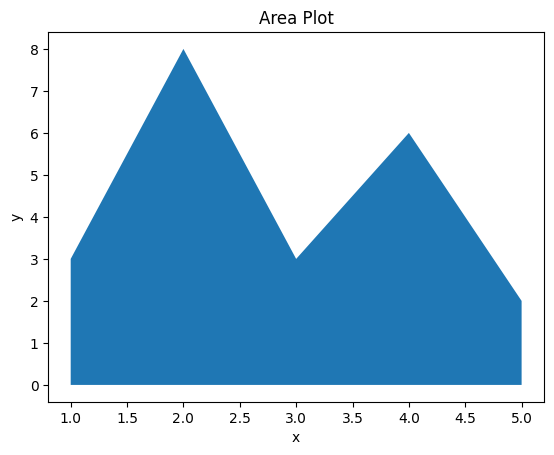

In [ ]:
# Area plot
x = np.arange(1, 6)
y = np.random.randint(1, 10, (5,))

plt.fill_between(x, y)
plt.title("Area Plot")
plt.xlabel("x")
plt.ylabel("y");

Text(0, 0.5, 'y')

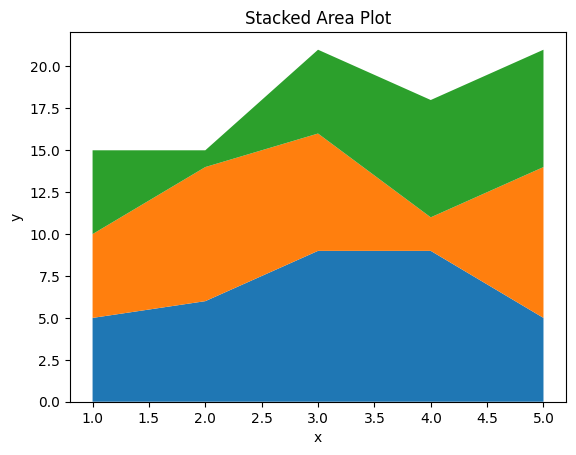

In [ ]:
x = np.arange(1, 6)
y1 = np.random.randint(1, 10, (5,))
y2 = np.random.randint(1, 10, (5,))
y3 = np.random.randint(1, 10, (5,))

plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])
plt.title("Stacked Area Plot")
plt.xlabel("x")
plt.ylabel("y");

### 2. 氣泡圖(Bubble Plot)

`plt.scatter(x, y, s, alpha)`散布圖指定`s`參數(圓圈大小)即為氣泡圖，`alpha`參數為透明度。

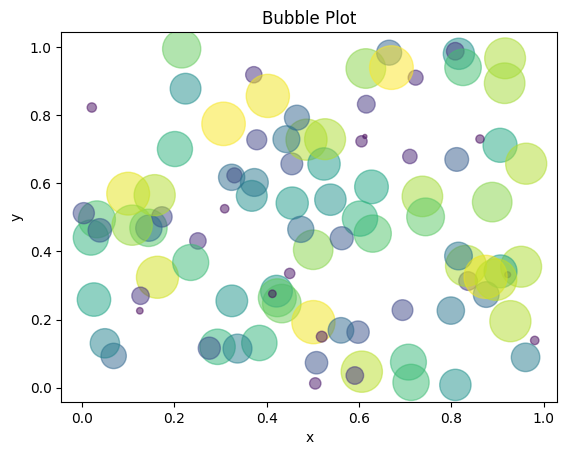

In [ ]:
# Bubble Plot
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)
plt.scatter(x, y, s=z*1000, c=z, alpha=0.5)

plt.title("Bubble Plot")
plt.xlabel("x")
plt.ylabel("y");

### 3. 極座標(Polar Axis)

`plt.subplot(projection="polar")`用`ax`畫圖。

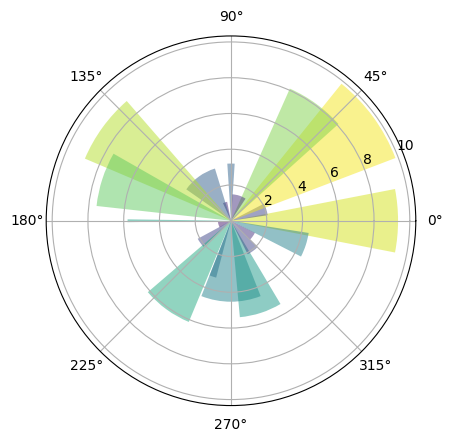

In [ ]:
rng = np.random.default_rng(317)

N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * rng.random((N,))
width = np.pi / 4 * rng.random((N,))
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection="polar")
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5);

### 4. 堆疊長條圖(Stacked Bar Chart)

用`ax.bar(x, y, bottom)`的`bottom`參數指定距底端的距離。

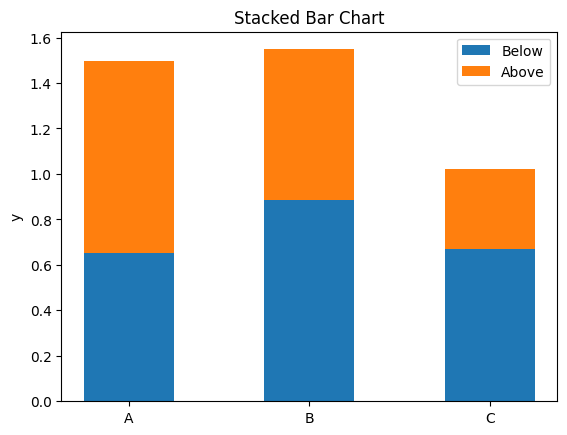

In [ ]:
# Stacked bar chart
fig, ax = plt.subplots()
bottom = np.zeros(3)

x = ["A", "B", "C"]
y1 = np.random.random((3,))
y2 = np.random.random((3,))

ax.bar(x, y1, width=0.5, label="Below", bottom=bottom)
ax.bar(x, y2, width=0.5, label="Above", bottom=bottom+y1)

ax.set_title("Stacked Bar Chart")
ax.legend(loc="upper right")
plt.ylabel("y");

### 5. 儲存圖表

`plt.savefig()`支援`.svg`, `.png`, `.jpg`圖片檔。

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

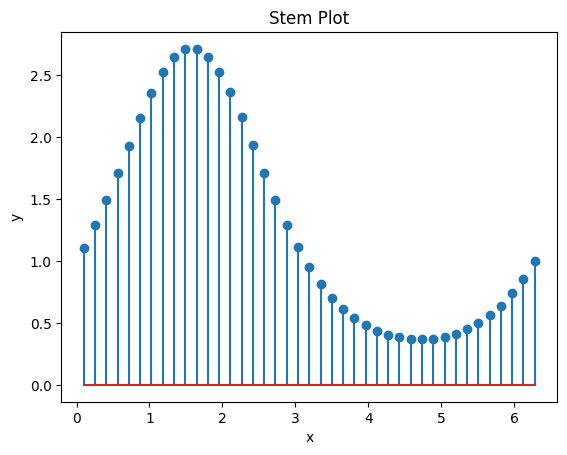

In [ ]:
# `savefig()`
from google.colab import files

x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

plt.stem(x, y)
plt.title("Stem Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("stem_plot.svg");

files.download("stem_plot.svg")